# Restaurant Reviews Classification

## Part 1: Data Preprocessing

<b> Importing Libraries & Dataset </b>

In [1]:
# Main Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
# quoting=3: we have many double quotes within the text, we have to ignore these double quotes

<b> Data Exploratory </b>

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# Statistical Summary
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


<b> Dealing with Missing Values </b>

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().values.sum()

0

<b> Countplot </b>

<Axes: xlabel='Liked', ylabel='count'>

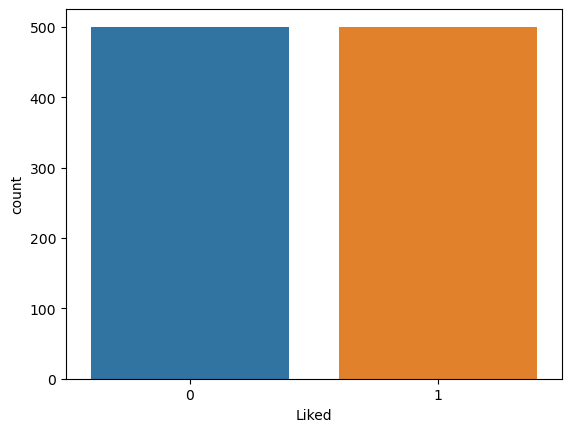

In [15]:
sns.countplot(data=df, x='Liked')

In [17]:
# Positive Reviews
(df.Liked == 1).sum()

500

In [18]:
# Negative Reviews
(df.Liked == 0).sum()

500

<b> Length of Messages </b>

In [19]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [21]:
df['Length'] = df['Review'].apply(len)

In [22]:
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<b> Histogram </b>

<Axes: ylabel='Frequency'>

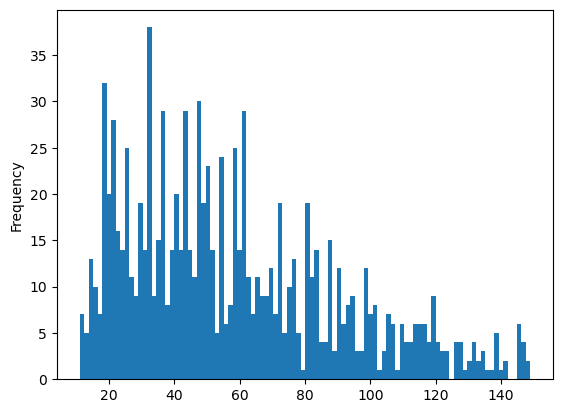

In [24]:
df['Length'].plot(bins=100, kind='hist')

<b> Longest & Shortest Messages </b>

In [25]:
df['Length'].describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [27]:
# Longest Message
df[df['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [28]:
# Shortest Message
df[df['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

<b> Splitting Data into Positive & Negative Messages </b>

In [29]:
positive = df[df['Liked'] == 1]

In [30]:
negative = df[df['Liked'] == 0]

<b> Cleaning the text </b>

In [34]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Import the 're' module for regular expressions, which is used for text processing.
import re

# Import the 'nltk' library, a natural language processing toolkit.
import nltk

# Download the 'stopwords' dataset if it's not already available.
nltk.download('stopwords')

# Import the 'stopwords' module from the Natural Language Toolkit (nltk.corpus).
from nltk.corpus import stopwords

# Import the Porter Stemmer from the NLTK library, a tool for stemming words in text.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mosta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
# Create an empty list to store preprocessed text data.
corpus = []

# Loop through the first 1000 entries in DataFrame
for i in range(0, 1000):
    # Remove non-alphabetic characters and replace with a space.
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    
    # Convert the text to lowercase for uniformity.
    review = review.lower()
    
    # Split the text into individual words.
    review = review.split()
    
    # Create a Porter Stemmer instance for word stemming.
    ps = PorterStemmer()
    
    # Get a set of English stopwords and remove 'not' from the set.
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    # Apply stemming to non-stopwords and remove stopwords.
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    
    # Join the processed words back into a single string.
    review = ' '.join(review)
    
    # Append the preprocessed review to the 'corpus' list.
    corpus.append(review)

<b> Creating the Bag of Words Model </b>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer(max_features=1500)

In [48]:
print(cv)

CountVectorizer(max_features=1500)


<b> Splitting the dataset </b>

In [43]:
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [44]:
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1]

In [45]:
x.shape

(1000, 1500)

In [46]:
y.shape

(1000,)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Part 2: Model Building

<b> 1- Naive Bayes </b>

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)

GaussianNB()

In [54]:
y_pred = classifier_nb.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [67]:
print(acc*100)

72.5


In [59]:
print(cm)

[[55 42]
 [12 91]]


<b> 2- XGBoost Classifier </b>

In [60]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.7 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 0.7/99.7 MB 6.6 MB/s eta 0:00:16
    --------------------------------------- 1.4/99.7 MB 9.2 MB/s eta 0:00:11
    --------------------------------------- 2.4/99.7 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 3.6/99.7 MB 14.4 MB/s eta 0:00:07
   -- ------------------------------------- 5.1/99.7 MB 17.1 MB/s eta 0:00:06
   -- ------------------------------------- 6.7/99.7 MB 19.6 MB/s eta 0:00:05
   --- ------------------------------------ 8.5/99.7 MB 21.8 MB/s eta 0:00:05
   ---- --------------------------

In [61]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
y_pred = classifier_xgb.predict(x_test)

In [63]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [66]:
print(acc*100)

72.5


In [65]:
print(cm)

[[80 17]
 [38 65]]


## Part 3: Conclusion

Due to the fact that the accuracy of the XGBoost Classifier Model is higher and more accuracte, the final model in this case will be XGBoost Classifier.